In [1]:
#importing variables
import pandas as pd
import numpy as np
import datetime as dt
import pandas_datareader as pdr
import matplotlib.dates as mpl_dates
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
#extracting A  Yahoo Finance API
tickers = ['AAL']
all_data = pd.DataFrame()
test_data = pd.DataFrame()
no_data = []

for i in tickers:
    try:
        test_data = pdr.get_data_yahoo(i, start = dt.datetime(1990,1,2), end = dt.date.today())
        test_data['symbol'] = i
        all_data = all_data.append(test_data)
    except:
        no_data.append(i)

#Creating Return column
all_data['return'] = all_data.groupby('symbol')['Close'].pct_change() 
all_data

,High,Low,Open,Close,Volume,Adj Close,symbol,return
Date,,,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910,AAL,NaN
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199,AAL,0.062176
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801,AAL,-0.014146
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999,AAL,0.039584
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938,AAL,0.023322
...,...,...,...,...,...,...,...,...
2021-01-15,16.280001,15.740000,16.170000,15.760000,55017500.0,15.760000,AAL,-0.041363
2021-01-19,16.270000,15.890000,15.990000,15.970000,39740200.0,15.970000,AAL,0.013325
2021-01-20,16.389999,15.840000,16.170000,16.170000,42354500.0,16.170000,AAL,0.012523


In [3]:
def isSupport(df,i):
  support = df['Low'][i-2] < df['Low'][i-3]  and df['Low'][i-2] < df['Low'][i-1] and df['Low'][i-1] < df['Low'][i] and df['Low'][i-3] < df['Low'][i-4]
  return support
def isResistance(df,i):
  resistance = df['High'][i-2] > df['High'][i-3]  and df['High'][i-2] > df['High'][i-1] and df['High'][i-1] > df['High'][i] and df['High'][i-3] > df['High'][i-4]
  return resistance

In [4]:
all_data['Date1'] = pd.to_datetime(all_data.index)
all_data['Date1'] = all_data['Date1'].apply(mpl_dates.date2num)
all_data

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1
Date,,,,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910,AAL,NaN,732216.0
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199,AAL,0.062176,732217.0
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801,AAL,-0.014146,732218.0
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999,AAL,0.039584,732219.0
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938,AAL,0.023322,732222.0
...,...,...,...,...,...,...,...,...,...
2021-01-15,16.280001,15.740000,16.170000,15.760000,55017500.0,15.760000,AAL,-0.041363,737805.0
2021-01-19,16.270000,15.890000,15.990000,15.970000,39740200.0,15.970000,AAL,0.013325,737809.0
2021-01-20,16.389999,15.840000,16.170000,16.170000,42354500.0,16.170000,AAL,0.012523,737810.0


In [5]:
levels = []
for i in range(0,all_data.shape[0]):
  if isSupport(all_data,i):
    levels.append((all_data['Date1'][i],all_data['Low'][i]))
  elif isResistance(all_data,i):
    levels.append((all_data['Date1'][i],all_data['High'][i]))
  else:
    levels.append((all_data['Date1'][i],0))   

In [6]:
df = pd.DataFrame(levels, columns=['Date1', 'levels'])
df.tail(60)


,Date1,levels
3797,737725.0,0.00
3798,737726.0,0.00
3799,737727.0,0.00
3800,737728.0,10.98
3801,737731.0,0.00
3802,737732.0,0.00
3803,737733.0,0.00
3804,737734.0,0.00
3805,737735.0,0.00
3806,737738.0,0.00


In [7]:
all_data = pd.merge(all_data, df, on=["Date1"], right_index=True, how= 'outer')
all_data.tail(50)

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels
Date,,,,,,,,,,
2020-11-10,13.020000,12.340000,12.850000,12.380000,127529300.0,12.380000,AAL,-0.062121,737739.0,0.00
2020-11-11,12.460000,11.930000,12.400000,12.040000,81359600.0,12.040000,AAL,-0.027464,737740.0,0.00
2020-11-12,12.230000,11.650000,11.970000,11.740000,75511700.0,11.740000,AAL,-0.024917,737741.0,0.00
2020-11-13,12.250000,11.850000,11.910000,12.240000,56421500.0,12.240000,AAL,0.042589,737742.0,0.00
2020-11-16,12.960000,12.410000,12.870000,12.790000,104867800.0,12.790000,AAL,0.044935,737745.0,12.41
2020-11-17,12.810000,12.230000,12.480000,12.700000,61956500.0,12.700000,AAL,-0.007037,737746.0,0.00
2020-11-18,13.360000,12.730000,12.910000,12.740000,99888500.0,12.740000,AAL,0.003150,737747.0,0.00
2020-11-19,13.040000,12.630000,12.730000,12.790000,58809400.0,12.790000,AAL,0.003925,737748.0,0.00
2020-11-20,12.910000,12.460000,12.800000,12.530000,58685500.0,12.530000,AAL,-0.020328,737749.0,0.00


In [8]:
all_data['levels']=all_data['levels'].replace(to_replace=0, method='ffill')
df.levels.fillna(method='ffill',inplace=True) 

In [9]:
all_data['SMA_5'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA_15'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA_10'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 10).mean())
all_data['SMA_20'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window = 15).mean())

all_data['SMA_ratio'] = all_data['SMA_15'] / all_data['SMA_5']
all_data['SMA_ratio2'] = all_data['SMA_10'] / all_data['SMA_5']
all_data['SMA_ratio3'] = all_data['SMA_15'] / all_data['SMA_10']
# all_data['SMA_ratio4'] = all_data['SMA_20'] / all_data['SMA_10']


all_data.tail(50)

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3
Date,,,,,,,,,,,,,,,,,
2020-11-10,13.020000,12.340000,12.850000,12.380000,127529300.0,12.380000,AAL,-0.062121,737739.0,10.98,11.930000,11.800667,11.548,11.800667,0.989159,0.967980,1.021880
2020-11-11,12.460000,11.930000,12.400000,12.040000,81359600.0,12.040000,AAL,-0.027464,737740.0,10.98,12.136000,11.753333,11.657,11.753333,0.968468,0.960531,1.008264
2020-11-12,12.230000,11.650000,11.970000,11.740000,75511700.0,11.740000,AAL,-0.024917,737741.0,10.98,12.164000,11.659333,11.715,11.659333,0.958511,0.963088,0.995248
2020-11-13,12.250000,11.850000,11.910000,12.240000,56421500.0,12.240000,AAL,0.042589,737742.0,10.98,12.320000,11.635333,11.811,11.635333,0.944426,0.958685,0.985127
2020-11-16,12.960000,12.410000,12.870000,12.790000,104867800.0,12.790000,AAL,0.044935,737745.0,12.41,12.238000,11.701333,11.971,11.701333,0.956148,0.978183,0.977473
2020-11-17,12.810000,12.230000,12.480000,12.700000,61956500.0,12.700000,AAL,-0.007037,737746.0,12.41,12.302000,11.799333,12.116,11.799333,0.959139,0.984881,0.973864
2020-11-18,13.360000,12.730000,12.910000,12.740000,99888500.0,12.740000,AAL,0.003150,737747.0,12.41,12.442000,11.918667,12.289,11.918667,0.957938,0.987703,0.969865
2020-11-19,13.040000,12.630000,12.730000,12.790000,58809400.0,12.790000,AAL,0.003925,737748.0,12.41,12.652000,12.027333,12.408,12.027333,0.950627,0.980715,0.969321
2020-11-20,12.910000,12.460000,12.800000,12.530000,58685500.0,12.530000,AAL,-0.020328,737749.0,12.41,12.710000,12.110667,12.515,12.110667,0.952846,0.984658,0.967692


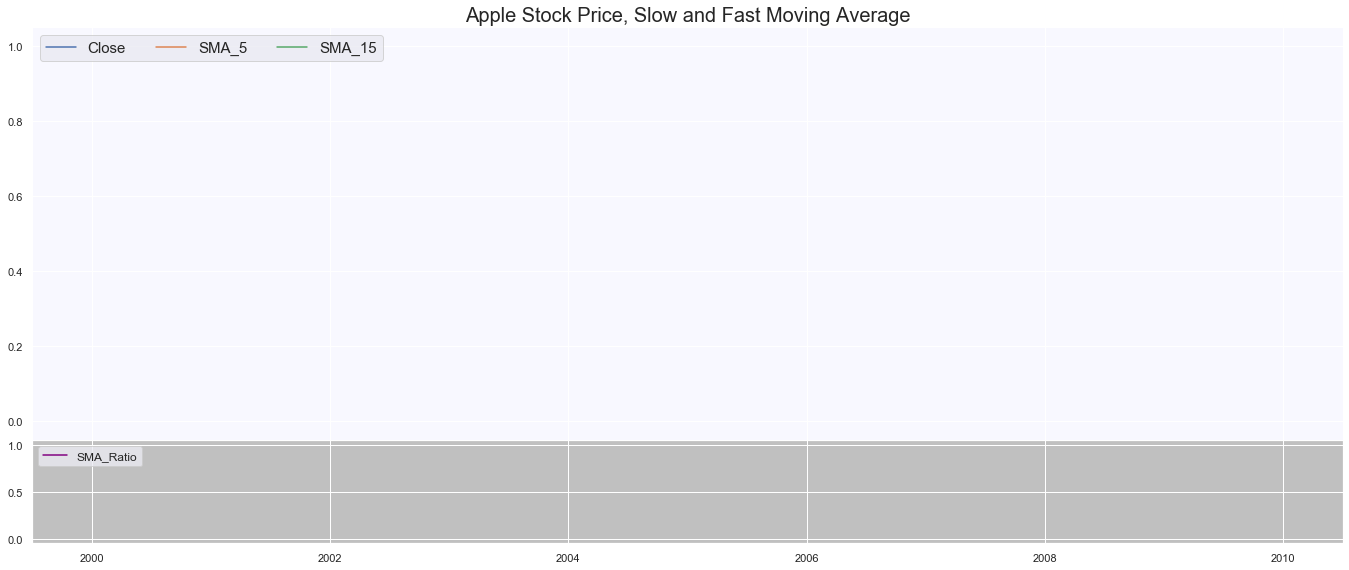

In [10]:
#Plotting
start = dt.datetime.strptime('2020-01-02', '%Y-%m-%d')
end = dt.datetime.strptime('2020-12-31', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['Close','SMA_5','SMA_15']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','SMA_5','SMA_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Apple Stock Price, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['SMA_ratio']], color = 'purple')
ax1.legend(['SMA_Ratio'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

In [11]:
# Simple moving average of VOLUME
all_data['SMA5_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 5).mean())
all_data['SMA15_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 15).mean())
all_data['SMA10_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 10).mean())
all_data['SMA20_Volume'] = all_data.groupby('symbol')['Volume'].transform(lambda x: x.rolling(window = 20).mean())

all_data['SMA_Volume_Ratio'] = all_data['SMA5_Volume']/all_data['SMA15_Volume']
all_data['SMA_Volume_Ratio2'] = all_data['SMA10_Volume']/all_data['SMA15_Volume']
all_data['SMA_Volume_Ratio3'] = all_data['SMA5_Volume']/all_data['SMA10_Volume']
all_data['SMA_Volume_Ratio4'] = all_data['SMA10_Volume']/all_data['SMA20_Volume']
all_data['SMA_Volume_Ratio5'] = all_data['SMA5_Volume']/all_data['SMA20_Volume']



all_data.tail(50)

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,...,SMA_ratio3,SMA5_Volume,SMA15_Volume,SMA10_Volume,SMA20_Volume,SMA_Volume_Ratio,SMA_Volume_Ratio2,SMA_Volume_Ratio3,SMA_Volume_Ratio4,SMA_Volume_Ratio5
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-10,13.020000,12.340000,12.850000,12.380000,127529300.0,12.380000,AAL,-0.062121,737739.0,10.98,...,1.021880,99146260.0,7.403930e+07,74035610.0,65602005.0,1.339103,0.999950,1.339170,1.128557,1.511330
2020-11-11,12.460000,11.930000,12.400000,12.040000,81359600.0,12.040000,AAL,-0.027464,737740.0,10.98,...,1.008264,106361920.0,7.696303e+07,75731590.0,67787600.0,1.381987,0.984000,1.404459,1.117189,1.569047
2020-11-12,12.230000,11.650000,11.970000,11.740000,75511700.0,11.740000,AAL,-0.024917,737741.0,10.98,...,0.995248,110486100.0,7.594455e+07,78875700.0,69874380.0,1.454826,1.038596,1.400762,1.128821,1.581210
2020-11-13,12.250000,11.850000,11.910000,12.240000,56421500.0,12.240000,AAL,0.042589,737742.0,10.98,...,0.985127,114429660.0,7.365346e+07,79389380.0,71059590.0,1.553622,1.077877,1.441372,1.117223,1.610334
2020-11-16,12.960000,12.410000,12.870000,12.790000,104867800.0,12.790000,AAL,0.044935,737745.0,12.41,...,0.977473,89137980.0,7.495467e+07,85766710.0,73774945.0,1.189225,1.144248,1.039307,1.162545,1.208242
2020-11-17,12.810000,12.230000,12.480000,12.700000,61956500.0,12.700000,AAL,-0.007037,737746.0,12.41,...,0.973864,76023420.0,7.469821e+07,87584840.0,74535330.0,1.017741,1.172516,0.867997,1.175078,1.019965
2020-11-18,13.360000,12.730000,12.910000,12.740000,99888500.0,12.740000,AAL,0.003150,737747.0,12.41,...,0.969865,79729200.0,7.706413e+07,93045560.0,77654575.0,1.034583,1.207378,0.856883,1.198198,1.026716
2020-11-19,13.040000,12.630000,12.730000,12.790000,58809400.0,12.790000,AAL,0.003925,737748.0,12.41,...,0.969321,76388740.0,7.804671e+07,93437420.0,76055600.0,0.978757,1.197199,0.817539,1.228541,1.004380
2020-11-20,12.910000,12.460000,12.800000,12.530000,58685500.0,12.530000,AAL,-0.020328,737749.0,12.41,...,0.967692,76841540.0,7.854010e+07,95635600.0,74450480.0,0.978373,1.217666,0.803483,1.284553,1.032116


In [12]:
# Smoothing with Wilder puts emphasis on recent values
def Wilder(data, periods):
    start = np.where(~np.isnan(data))[0][0] #Check if nans present in beginning
    Wilder = np.array([np.nan]*len(data))
    Wilder[start+periods-1] = data[start:(start+periods)].mean() #Simple Moving Average
    for i in range(start+periods,len(data)):
        Wilder[i] = (Wilder[i-1]*(periods-1) + data[i])/periods #Wilder Smoothing
    return(Wilder)

In [13]:
# ATR ratio is used to figure out a true range, for volatility
all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum((all_data['High'] - all_data['Low']), 
                     np.maximum(abs(all_data['High'] - all_data['prev_close']), 
                     abs(all_data['prev_close'] - all_data['Low'])))
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
    all_data.loc[all_data.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)
    all_data.loc[all_data.symbol==i,'ATR_10'] = Wilder(TR_data['TR'], 10)

all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']
all_data['ATR_Ratio2'] = all_data['ATR_5'] / all_data['ATR_10']
all_data['ATR_Ratio3'] = all_data['ATR_10'] / all_data['ATR_15']


In [14]:
# ATR ratio is used to figure out a true range, for volatility
all_data['prev_close'] = all_data.groupby('symbol')['Close'].shift(1)
all_data['TR'] = np.maximum((all_data['High'] - all_data['Low']), 
                     np.maximum(abs(all_data['High'] - all_data['prev_close']), 
                     abs(all_data['prev_close'] - all_data['Low'])))
for i in all_data['symbol'].unique():
    TR_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ATR_5'] = Wilder(TR_data['TR'], 5)
    all_data.loc[all_data.symbol==i,'ATR_15'] = Wilder(TR_data['TR'], 15)
    all_data.loc[all_data.symbol==i,'ATR_10'] = Wilder(TR_data['TR'], 10)

all_data['ATR_Ratio'] = all_data['ATR_5'] / all_data['ATR_15']
all_data['ATR_Ratio2'] = all_data['ATR_5'] / all_data['ATR_10']
all_data['ATR_Ratio3'] = all_data['ATR_10'] / all_data['ATR_15']



In [15]:
all_data['prev_high'] = all_data.groupby('symbol')['High'].shift(1)
all_data['prev_low'] = all_data.groupby('symbol')['Low'].shift(1)

all_data['+DM'] = np.where(~np.isnan(all_data.prev_high),
                           np.where((all_data['High'] > all_data['prev_high']) & 
         (((all_data['High'] - all_data['prev_high']) > (all_data['prev_low'] - all_data['Low']))), 
                                                                  all_data['High'] - all_data['prev_high'], 
                                                                  0),np.nan)

all_data['-DM'] = np.where(~np.isnan(all_data.prev_low),
                           np.where((all_data['prev_low'] > all_data['Low']) & 
         (((all_data['prev_low'] - all_data['Low']) > (all_data['High'] - all_data['prev_high']))), 
                                    all_data['prev_low'] - all_data['Low'], 
                                    0),np.nan)

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'+DM_5'] = Wilder(ADX_data['+DM'], 5)
    all_data.loc[all_data.symbol==i,'-DM_5'] = Wilder(ADX_data['-DM'], 5)
    all_data.loc[all_data.symbol==i,'+DM_15'] = Wilder(ADX_data['+DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_15'] = Wilder(ADX_data['-DM'], 15)
    all_data.loc[all_data.symbol==i,'-DM_10'] = Wilder(ADX_data['-DM'], 10)
    all_data.loc[all_data.symbol==i,'+DM_10'] = Wilder(ADX_data['+DM'], 10)


all_data['+DI_5'] = (all_data['+DM_5']/all_data['ATR_5'])*100
all_data['-DI_5'] = (all_data['-DM_5']/all_data['ATR_5'])*100
all_data['+DI_15'] = (all_data['+DM_15']/all_data['ATR_15'])*100
all_data['-DI_15'] = (all_data['-DM_15']/all_data['ATR_15'])*100
all_data['-DI_10'] = (all_data['-DM_10']/all_data['ATR_10'])*100
all_data['+DI_10'] = (all_data['+DM_10']/all_data['ATR_10'])*100



all_data['DX_5'] = (np.round(abs(all_data['+DI_5'] - all_data['-DI_5'])/(all_data['+DI_5'] + all_data['-DI_5']) * 100))
all_data['DX_10'] = (np.round(abs(all_data['+DI_10'] - all_data['-DI_10'])/(all_data['+DI_10'] + all_data['-DI_10']) * 100))
all_data['DX_15'] = (np.round(abs(all_data['+DI_15'] - all_data['-DI_15'])/(all_data['+DI_15'] + all_data['-DI_15']) * 100))

for i in all_data['symbol'].unique():
    ADX_data = all_data[all_data.symbol == i].copy()
    all_data.loc[all_data.symbol==i,'ADX_5'] = Wilder(ADX_data['DX_5'], 5)
    all_data.loc[all_data.symbol==i,'ADX_15'] = Wilder(ADX_data['DX_15'], 15)
    all_data.loc[all_data.symbol==i,'ADX_10'] = Wilder(ADX_data['DX_10'], 10)

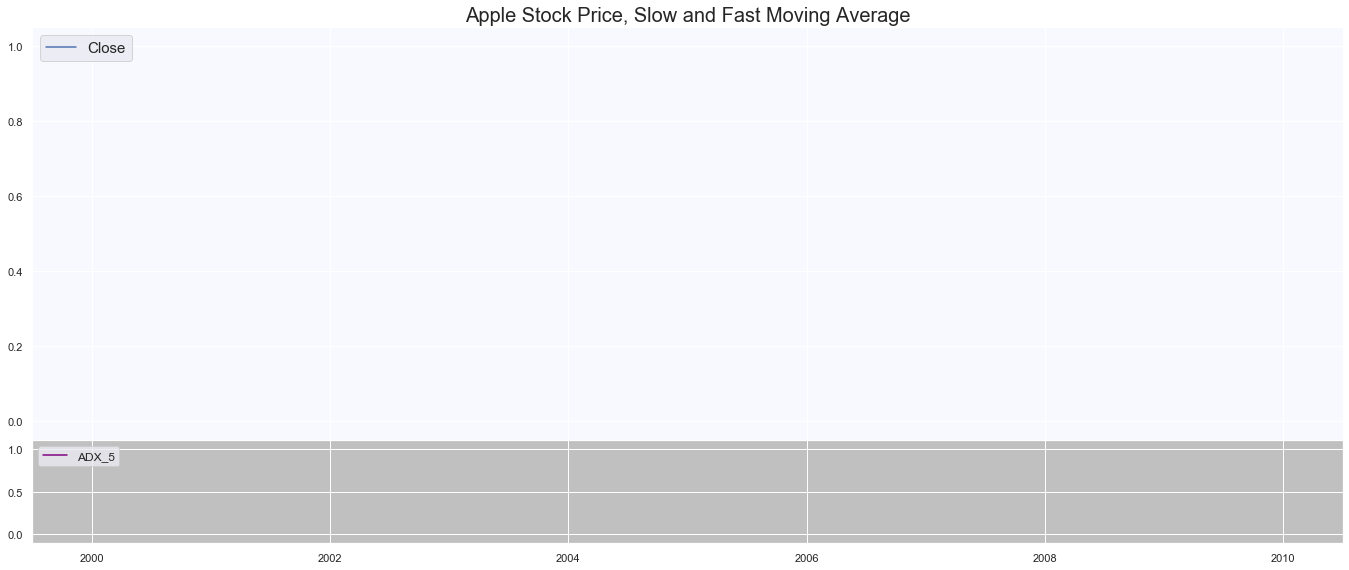

In [16]:
#Plotting
start = dt.datetime.strptime('2020-01-02', '%Y-%m-%d')
end = dt.datetime.strptime('2020-12-31', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['Close']])
ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','ADX_5','ADX_15'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Apple Stock Price, Slow and Fast Moving Average", fontsize = 20)

ax1 = plt.subplot2grid((6,4), (5,0), rowspan=1, colspan=4, sharex = ax0)
ax1.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['ADX_5']], color = 'purple')
ax1.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['ADX_15']], color = 'GREEN')
ax1.legend(['ADX_5'],ncol=3, loc = 'upper left', fontsize = 12)
ax1.set_facecolor('silver')


plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

In [17]:
# Stochastic oscillator for overbought/ oversold

all_data['Lowest_5D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 5).min())
all_data['High_5D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 5).max())
all_data['Lowest_10D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 10).min())
all_data['High_10D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 10).max())
all_data['Lowest_15D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 15).min())
all_data['High_15D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 15).max())
all_data['Lowest_20D'] = all_data.groupby('symbol')['Low'].transform(lambda x: x.rolling(window = 20).min())
all_data['High_20D'] = all_data.groupby('symbol')['High'].transform(lambda x: x.rolling(window = 20).max())

all_data['Stochastic_5'] = ((all_data['Close'] - all_data['Lowest_5D'])/(all_data['High_5D'] - all_data['Lowest_5D']))*100
all_data['Stochastic_10'] = ((all_data['Close'] - all_data['Lowest_10D'])/(all_data['High_10D'] - all_data['Lowest_10D']))*100
all_data['Stochastic_15'] = ((all_data['Close'] - all_data['Lowest_15D'])/(all_data['High_15D'] - all_data['Lowest_15D']))*100
all_data['Stochastic_20'] = ((all_data['Close'] - all_data['Lowest_20D'])/(all_data['High_20D'] - all_data['Lowest_20D']))*100

all_data['Stochastic_%D_5'] = all_data['Stochastic_5'].rolling(window = 5).mean()
all_data['Stochastic_%D_10'] = all_data['Stochastic_10'].rolling(window = 10).mean()
all_data['Stochastic_%D_15'] = all_data['Stochastic_15'].rolling(window = 15).mean()
all_data['Stochastic_%D_20'] = all_data['Stochastic_20'].rolling(window = 20).mean()

all_data['Stochastic_Ratio'] = all_data['Stochastic_%D_5']/all_data['Stochastic_%D_15']
all_data['Stochastic_Ratio2'] = all_data['Stochastic_%D_10']/all_data['Stochastic_%D_15']
all_data['Stochastic_Ratio5'] = all_data['Stochastic_%D_10']/all_data['Stochastic_%D_20']
all_data['Stochastic_Ratio6'] = all_data['Stochastic_%D_15']/all_data['Stochastic_%D_20']

In [18]:
# RSI using stoch 

all_data['Diff'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('symbol')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('symbol')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']
all_data

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,...,Down,avg_5up,avg_5down,avg_15up,avg_15down,RS_5,RS_15,RSI_5,RSI_15,RSI_ratio
Date,,,,,,,,,,,,,,,,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910,AAL,NaN,732216.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199,AAL,0.062176,732217.0,19.200001,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801,AAL,-0.014146,732218.0,19.200001,...,0.290001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999,AAL,0.039584,732219.0,19.200001,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938,AAL,0.023322,732222.0,19.200001,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,16.280001,15.740000,16.170000,15.760000,55017500.0,15.760000,AAL,-0.041363,737805.0,15.110000,...,0.680000,0.288,0.162,0.168000,0.176667,1.777778,0.950943,63.999997,48.742746,1.313016
2021-01-19,16.270000,15.890000,15.990000,15.970000,39740200.0,15.970000,AAL,0.013325,737809.0,16.270000,...,0.000000,0.330,0.136,0.182000,0.161333,2.426470,1.128099,70.815449,53.009712,1.335896
2021-01-20,16.389999,15.840000,16.170000,16.170000,42354500.0,16.170000,AAL,0.012523,737810.0,16.270000,...,0.000000,0.294,0.136,0.168667,0.161333,2.161764,1.045455,68.372087,51.111117,1.337715


In [19]:
# MACD for 26 and 12 day

all_data['12Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
all_data['26Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

all_data['5Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=5, adjust=False).mean())
all_data['15Ewm'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.ewm(span=15, adjust=False).mean())
all_data['MACD'] = (all_data['12Ewm'] - all_data['26Ewm'])

all_data['MACD2'] = (all_data['5Ewm'] - all_data['15Ewm'])
all_data.tail(50)

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,...,RS_15,RSI_5,RSI_15,RSI_ratio,12Ewm,26Ewm,5Ewm,15Ewm,MACD,MACD2
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-10,13.020000,12.340000,12.850000,12.380000,127529300.0,12.380000,AAL,-0.062121,737739.0,10.98,...,0.881356,66.005669,46.846846,1.408967,11.907666,12.074470,12.118461,11.927624,-0.166804,0.190837
2020-11-11,12.460000,11.930000,12.400000,12.040000,81359600.0,12.040000,AAL,-0.027464,737740.0,10.98,...,0.814621,64.187324,44.892086,1.429814,11.928025,12.071917,12.092307,11.941671,-0.143892,0.150637
2020-11-12,12.230000,11.650000,11.970000,11.740000,75511700.0,11.740000,AAL,-0.024917,737741.0,10.98,...,0.658596,52.095799,39.708031,1.311971,11.899098,12.047330,11.974872,11.916462,-0.148232,0.058410
2020-11-13,12.250000,11.850000,11.910000,12.240000,56421500.0,12.240000,AAL,0.042589,737742.0,10.98,...,0.899441,60.540537,47.352937,1.278496,11.951545,12.061602,12.063248,11.956904,-0.110057,0.106343
2020-11-16,12.960000,12.410000,12.870000,12.790000,104867800.0,12.790000,AAL,0.044935,737745.0,12.41,...,1.356115,41.832673,57.557249,0.726801,12.080538,12.115557,12.305498,12.061041,-0.035020,0.244457
2020-11-17,12.810000,12.230000,12.480000,12.700000,61956500.0,12.700000,AAL,-0.007037,737746.0,12.41,...,1.639130,58.988752,62.108732,0.949766,12.175840,12.158850,12.436999,12.140911,0.016990,0.296088
2020-11-18,13.360000,12.730000,12.910000,12.740000,99888500.0,12.740000,AAL,0.003150,737747.0,12.41,...,1.886138,73.648634,65.351627,1.126959,12.262633,12.201898,12.537999,12.215797,0.060736,0.322202
2020-11-19,13.040000,12.630000,12.730000,12.790000,58809400.0,12.790000,AAL,0.003925,737748.0,12.41,...,1.806931,92.682917,64.373896,1.439759,12.343767,12.245461,12.621999,12.287572,0.098306,0.334427
2020-11-20,12.910000,12.460000,12.800000,12.530000,58685500.0,12.530000,AAL,-0.020328,737749.0,12.41,...,1.548245,64.646452,60.757312,1.064011,12.372418,12.266538,12.591333,12.317876,0.105880,0.273457


In [20]:
#Bollinger for volatility and overbought/oversold
all_data['15MA'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).mean())
all_data['SD'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.rolling(window=15).std())
all_data['upperband'] = all_data['15MA'] + 2*all_data['SD']
all_data['lowerband'] = all_data['15MA'] - 2*all_data['SD']
all_data

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,...,12Ewm,26Ewm,5Ewm,15Ewm,MACD,MACD2,15MA,SD,upperband,lowerband
Date,,,,,,,,,,,,,,,,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910,AAL,NaN,732216.0,0.000000,...,19.299999,19.299999,19.299999,19.299999,0.000000,0.000000,NaN,NaN,NaN,NaN
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199,AAL,0.062176,732217.0,19.200001,...,19.484615,19.388888,19.699999,19.449999,0.095727,0.250000,NaN,NaN,NaN,NaN
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801,AAL,-0.014146,732218.0,19.200001,...,19.596212,19.449711,19.869999,19.544999,0.146501,0.325000,NaN,NaN,NaN,NaN
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999,AAL,0.039584,732219.0,19.200001,...,19.813718,19.565288,20.250000,19.728124,0.248430,0.521875,NaN,NaN,NaN,NaN
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938,AAL,0.023322,732222.0,19.200001,...,20.073146,19.708600,20.666666,19.949609,0.364546,0.717058,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,16.280001,15.740000,16.170000,15.760000,55017500.0,15.760000,AAL,-0.041363,737805.0,15.110000,...,15.671911,15.581645,15.739227,15.680526,0.090266,0.058701,15.613333,0.403691,16.420716,14.805951
2021-01-19,16.270000,15.890000,15.990000,15.970000,39740200.0,15.970000,AAL,0.013325,737809.0,16.270000,...,15.717771,15.610412,15.816151,15.716710,0.107359,0.099441,15.634000,0.414053,16.462106,14.805894
2021-01-20,16.389999,15.840000,16.170000,16.170000,42354500.0,16.170000,AAL,0.012523,737810.0,16.270000,...,15.787345,15.651863,15.934101,15.773372,0.135482,0.160729,15.641333,0.423014,16.487362,14.795305


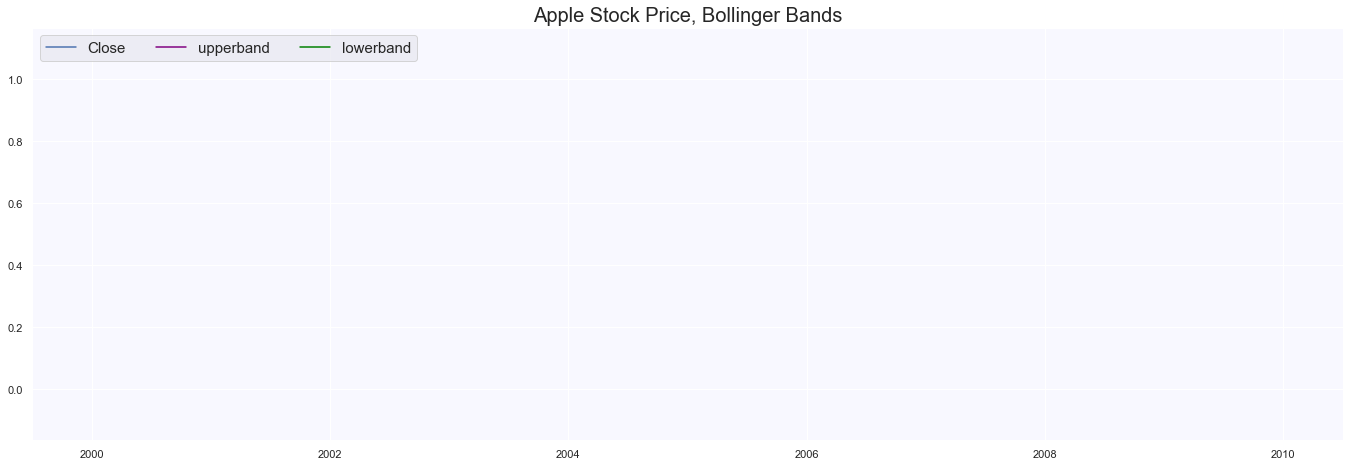

In [21]:
#Plotting
start = dt.datetime.strptime('2020-01-02', '%Y-%m-%d')
end = dt.datetime.strptime('2020-12-31', '%Y-%m-%d')
sns.set()

fig = plt.figure(facecolor = 'white', figsize = (20,10))

ax0 = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4)
ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['Close']])

ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['upperband']], color = 'purple')
ax0.plot(all_data[all_data.symbol=='AAPL'].loc[start:end,['lowerband']], color = 'GREEN')

ax0.set_facecolor('ghostwhite')
ax0.legend(['Close','upperband', 'lowerband'],ncol=3, loc = 'upper left', fontsize = 15)
plt.title("Apple Stock Price, Bollinger Bands", fontsize = 20)

plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)
plt.show()

In [22]:
all_data['RC'] = all_data.groupby('symbol')['Close'].transform(lambda x: x.pct_change(periods = 15)) 

In [23]:
all_data.head(10)

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,...,26Ewm,5Ewm,15Ewm,MACD,MACD2,15MA,SD,upperband,lowerband,RC
Date,,,,,,,,,,,,,,,,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910,AAL,NaN,732216.0,0.000000,...,19.299999,19.299999,19.299999,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199,AAL,0.062176,732217.0,19.200001,...,19.388888,19.699999,19.449999,0.095727,0.250000,NaN,NaN,NaN,NaN,NaN
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801,AAL,-0.014146,732218.0,19.200001,...,19.449711,19.869999,19.544999,0.146501,0.325000,NaN,NaN,NaN,NaN,NaN
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999,AAL,0.039584,732219.0,19.200001,...,19.565288,20.250000,19.728124,0.248430,0.521875,NaN,NaN,NaN,NaN,NaN
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938,AAL,0.023322,732222.0,19.200001,...,19.708600,20.666666,19.949609,0.364546,0.717058,NaN,NaN,NaN,NaN,NaN
2005-10-04,22.500000,21.440001,21.440001,22.160000,1768800.0,20.891151,AAL,0.030698,732223.0,19.200001,...,19.890185,21.164444,20.225908,0.504015,0.938536,NaN,NaN,NaN,NaN,NaN
2005-10-05,22.309999,21.750000,22.100000,22.200001,904300.0,20.928862,AAL,0.001805,732224.0,19.200001,...,20.061283,21.509630,20.472669,0.610733,1.036960,NaN,NaN,NaN,NaN,NaN
2005-10-06,23.000000,22.400000,22.600000,22.580000,1614200.0,21.287100,AAL,0.017117,732225.0,19.200001,...,20.247854,21.866420,20.736086,0.717698,1.130334,NaN,NaN,NaN,NaN,NaN
2005-10-07,22.600000,21.799999,22.250000,22.150000,753400.0,20.881725,AAL,-0.019043,732226.0,19.200001,...,20.388754,21.960946,20.912825,0.759021,1.048121,NaN,NaN,NaN,NaN,NaN


In [24]:
# forecast_out = int(math.ceil(0.00192*len(all_data)))
forecast_out = 13
forecast_out2 = 15
forecast_col = 'Adj Close'
vforecast_col = 'Volume'

all_data['label'] = all_data[forecast_col].shift(-forecast_out)
all_data['second'] = all_data[forecast_col].shift(-forecast_out2)

all_data['label1'] = all_data[forecast_col].shift(2)
all_data['label2'] = all_data[forecast_col].shift(3)
all_data['label3'] = all_data[forecast_col].shift(4)
all_data['label4'] = all_data[forecast_col].shift(5)
all_data['label5'] = all_data[forecast_col].shift(6)
all_data['label6'] = all_data[forecast_col].shift(7)
all_data['label7'] = all_data[forecast_col].shift(8)
all_data['label8'] = all_data[forecast_col].shift(9)
all_data['label9'] = all_data[forecast_col].shift(10)
all_data['label10'] = all_data[forecast_col].shift(11)
all_data['label11'] = all_data[forecast_col].shift(12)
all_data['label12'] = all_data[forecast_col].shift(13)
all_data['label13'] = all_data[forecast_col].shift(14)
all_data['label14'] = all_data[forecast_col].shift(15)
all_data['label15'] = all_data[forecast_col].shift(16)
all_data['label16'] = all_data[forecast_col].shift(17)
all_data['label17'] = all_data[forecast_col].shift(18)
all_data['label18'] = all_data[forecast_col].shift(19)
all_data['label19'] = all_data[forecast_col].shift(20)

all_data['vlabel10'] = all_data[vforecast_col].shift(11)
all_data['vlabel14'] = all_data[vforecast_col].shift(15)

# all_data['rsi_shift'] = all_data['RSI_5'].shift(15)
# all_data['rsi_shift2'] = all_data['RSI_5'].shift(5)


In [25]:
all_data['Difference'] = all_data['label'] - all_data['Adj Close']
all_data['second_Difference'] = all_data['second'] - all_data['Adj Close']
# all_data['Difference1'] = all_data['label1'] - all_data['Adj Close']
# all_data['Difference2'] = all_data['label2'] - all_data['Adj Close']
# all_data['Difference3'] = all_data['label3'] - all_data['Adj Close']
# all_data['Difference4'] = all_data['label4'] - all_data['Adj Close']
all_data['Difference6'] = all_data['label6'] - all_data['Adj Close']
all_data['Difference7'] = all_data['label7'] - all_data['Adj Close']
all_data['Difference8'] = all_data['label8'] - all_data['Adj Close']
all_data['Difference9'] = all_data['label9'] - all_data['Adj Close']
all_data['Difference10'] = all_data['label10'] - all_data['Adj Close']
all_data['Difference11'] = all_data['label11'] - all_data['Adj Close']
all_data['Difference12'] = all_data['label12'] - all_data['Adj Close']
all_data['Difference13'] = all_data['label13'] - all_data['Adj Close']
all_data['Difference14'] = all_data['label14'] - all_data['Adj Close']
all_data['Difference15'] = all_data['label15'] - all_data['Adj Close']
all_data['Difference16'] = all_data['label16'] - all_data['Adj Close']
all_data['Difference17'] = all_data['label17'] - all_data['Adj Close']
all_data['Difference18'] = all_data['label18'] - all_data['Adj Close']
all_data['Difference19'] = all_data['label19'] - all_data['Adj Close']

all_data['Difference200'] = all_data['levels'] - all_data['Adj Close']
# all_data['Difference201'] = all_data['levels'] - all_data['label14']
# all_data['Difference202'] = all_data['levels'] - all_data['label10']
# all_data['Difference203'] = all_data['levels'] - all_data['label17']
# all_data['Difference204'] = all_data['levels'] - all_data['label12']

# all_data['RSI Diff'] = (all_data['RSI_15'] - all_data['rsi_shift2']) 




all_data.head(50)

,High,Low,Open,Close,Volume,Adj Close,symbol,return,Date1,levels,...,Difference11,Difference12,Difference13,Difference14,Difference15,Difference16,Difference17,Difference18,Difference19,Difference200
Date,,,,,,,,,,,,,,,,,,,,,
2005-09-27,21.400000,19.100000,21.049999,19.299999,961200.0,18.194910,AAL,NaN,732216.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.194910
2005-09-28,20.530001,19.200001,19.299999,20.500000,5747900.0,19.326199,AAL,0.062176,732217.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.126198
2005-09-29,20.580000,20.100000,20.400000,20.209999,1078200.0,19.052801,AAL,-0.014146,732218.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147200
2005-09-30,21.049999,20.180000,20.260000,21.010000,3123300.0,19.806999,AAL,0.039584,732219.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.606998
2005-10-03,21.750000,20.900000,20.900000,21.500000,1057900.0,20.268938,AAL,0.023322,732222.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.068937
2005-10-04,22.500000,21.440001,21.440001,22.160000,1768800.0,20.891151,AAL,0.030698,732223.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.691151
2005-10-05,22.309999,21.750000,22.100000,22.200001,904300.0,20.928862,AAL,0.001805,732224.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.728861
2005-10-06,23.000000,22.400000,22.600000,22.580000,1614200.0,21.287100,AAL,0.017117,732225.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.087099
2005-10-07,22.600000,21.799999,22.250000,22.150000,753400.0,20.881725,AAL,-0.019043,732226.0,19.200001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.681725


In [26]:
all_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'symbol',
       'return', 'Date1', 'levels',
       ...
       'Difference11', 'Difference12', 'Difference13', 'Difference14',
       'Difference15', 'Difference16', 'Difference17', 'Difference18',
       'Difference19', 'Difference200'],
      dtype='object', length=139)

In [27]:
# #Buy or sell column tells if the price is up or down in next 15 days
# conditions = [
#     ((all_data['Difference'] >= 0) & (all_data['Difference'] <= 2)),
#     (all_data['Difference'] > 2),
#     (all_data['Difference'] < 0)
# ]
# choices = [
#     '1.0',
#     '2.0',
#     '-1.0'
# ]
# # create a new column or assign it to an existing
# # the last param in np.select is default
# all_data['Buy or Sell'] = np.select(conditions, choices, -4.0)
# # def cut(arr):
# #     bins = np.empty(arr.shape[0])
# #     for idx, x in enumerate(arr):
# #         if (x >= 0) & (x <= 2):
# #             bins[idx] = 1
# #         elif (x > 2):
# #             bins[idx] = 2
# #         elif (x < 0) & (x >= -2):
# #             bins[idx] = -1
# #         elif (x < -2):
# #             bins[idx] = -2
# #         else:
# #             bins[idx] = all_data['Difference'][idx]

# #     return bins
# # all_data['Buy or Sell'] = cut(all_data['Difference'].to_numpy())



# all_data.drop(columns=['High','+DM','-DM', 'prev_close', 'prev_high', 'prev_low','return','Low','Open','Close','symbol','Difference','label'], inplace=True)
#Buy or sell column tells if the price is up or down in next 15 days
all_data['Buy or Sell'] = (all_data['Difference'] > (0.0014 * all_data['Adj Close'])).astype(int)
all_data['Buy or Sell2'] = (all_data['second_Difference'] > (0.0014 * all_data['Adj Close'])).astype(int)

all_data.drop(columns=['High','Diff','+DM','-DM', 'prev_close', 'prev_high', 'prev_low','return','Low',
                       'Down','Date1', 'levels','RSI_5','Open','Close','symbol','Difference','label','second','second_Difference'], inplace=True)


In [28]:
all_data.tail(50)

,Volume,Adj Close,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3,SMA5_Volume,...,Difference13,Difference14,Difference15,Difference16,Difference17,Difference18,Difference19,Difference200,Buy or Sell,Buy or Sell2
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-10,127529300.0,12.380000,11.930000,11.800667,11.548,11.800667,0.989159,0.967980,1.021880,99146260.0,...,0.370000,0.420000,0.180000,0.080000,-0.150001,-0.020000,-0.160000,-1.400001,1,1
2020-11-11,81359600.0,12.040000,12.136000,11.753333,11.657,11.753333,0.968468,0.960531,1.008264,106361920.0,...,1.110000,0.710000,0.760000,0.520000,0.420000,0.190000,0.320000,-1.060000,1,1
2020-11-12,75511700.0,11.740000,12.164000,11.659333,11.715,11.659333,0.958511,0.963088,0.995248,110486100.0,...,0.860001,1.410000,1.010000,1.060000,0.820001,0.720000,0.490000,-0.760000,1,1
2020-11-13,56421500.0,12.240000,12.320000,11.635333,11.811,11.635333,0.944426,0.958685,0.985127,114429660.0,...,-0.440000,0.360001,0.910000,0.510000,0.560000,0.320001,0.220000,-1.260000,1,1
2020-11-16,104867800.0,12.790000,12.238000,11.701333,11.971,11.701333,0.956148,0.978183,0.977473,89137980.0,...,-1.560000,-0.990000,-0.190000,0.360000,-0.040000,0.010000,-0.230000,-0.380000,1,1
2020-11-17,61956500.0,12.700000,12.302000,11.799333,12.116,11.799333,0.959139,0.984881,0.973864,76023420.0,...,-1.750000,-1.470000,-0.900000,-0.099999,0.450000,0.050000,0.100000,-0.290000,1,1
2020-11-18,99888500.0,12.740000,12.442000,11.918667,12.289,11.918667,0.957938,0.987703,0.969865,79729200.0,...,-1.580000,-1.790000,-1.510000,-0.940000,-0.139999,0.410000,0.010000,-0.330000,1,1
2020-11-19,58809400.0,12.790000,12.652000,12.027333,12.408,12.027333,0.950627,0.980715,0.969321,76388740.0,...,-1.510000,-1.630000,-1.840000,-1.560000,-0.990000,-0.190000,0.360000,-0.380000,1,1
2020-11-20,58685500.0,12.530000,12.710000,12.110667,12.515,12.110667,0.952846,0.984658,0.967692,76841540.0,...,-1.340000,-1.250000,-1.370000,-1.580000,-1.300000,-0.730000,0.070001,-0.120000,1,1


In [29]:
all_data['Buy or Sell'] = np.array(all_data['Buy or Sell'], dtype=float)
all_data['Buy or Sell2'] = np.array(all_data['Buy or Sell2'], dtype=float)

In [30]:
df = all_data.copy()
df.drop(df.tail(forecast_out2).index,inplace=True)

all_data.tail(50)

,Volume,Adj Close,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3,SMA5_Volume,...,Difference13,Difference14,Difference15,Difference16,Difference17,Difference18,Difference19,Difference200,Buy or Sell,Buy or Sell2
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-10,127529300.0,12.380000,11.930000,11.800667,11.548,11.800667,0.989159,0.967980,1.021880,99146260.0,...,0.370000,0.420000,0.180000,0.080000,-0.150001,-0.020000,-0.160000,-1.400001,1.0,1.0
2020-11-11,81359600.0,12.040000,12.136000,11.753333,11.657,11.753333,0.968468,0.960531,1.008264,106361920.0,...,1.110000,0.710000,0.760000,0.520000,0.420000,0.190000,0.320000,-1.060000,1.0,1.0
2020-11-12,75511700.0,11.740000,12.164000,11.659333,11.715,11.659333,0.958511,0.963088,0.995248,110486100.0,...,0.860001,1.410000,1.010000,1.060000,0.820001,0.720000,0.490000,-0.760000,1.0,1.0
2020-11-13,56421500.0,12.240000,12.320000,11.635333,11.811,11.635333,0.944426,0.958685,0.985127,114429660.0,...,-0.440000,0.360001,0.910000,0.510000,0.560000,0.320001,0.220000,-1.260000,1.0,1.0
2020-11-16,104867800.0,12.790000,12.238000,11.701333,11.971,11.701333,0.956148,0.978183,0.977473,89137980.0,...,-1.560000,-0.990000,-0.190000,0.360000,-0.040000,0.010000,-0.230000,-0.380000,1.0,1.0
2020-11-17,61956500.0,12.700000,12.302000,11.799333,12.116,11.799333,0.959139,0.984881,0.973864,76023420.0,...,-1.750000,-1.470000,-0.900000,-0.099999,0.450000,0.050000,0.100000,-0.290000,1.0,1.0
2020-11-18,99888500.0,12.740000,12.442000,11.918667,12.289,11.918667,0.957938,0.987703,0.969865,79729200.0,...,-1.580000,-1.790000,-1.510000,-0.940000,-0.139999,0.410000,0.010000,-0.330000,1.0,1.0
2020-11-19,58809400.0,12.790000,12.652000,12.027333,12.408,12.027333,0.950627,0.980715,0.969321,76388740.0,...,-1.510000,-1.630000,-1.840000,-1.560000,-0.990000,-0.190000,0.360000,-0.380000,1.0,1.0
2020-11-20,58685500.0,12.530000,12.710000,12.110667,12.515,12.110667,0.952846,0.984658,0.967692,76841540.0,...,-1.340000,-1.250000,-1.370000,-1.580000,-1.300000,-0.730000,0.070001,-0.120000,1.0,1.0


In [31]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)
clean_dataset(all_data)
all_data = all_data.dropna()
df = df.dropna()

In [32]:
df= df[df.applymap(np.isreal).any(1)]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3803 entries, 2005-11-18 to 2020-12-30
Columns: 121 entries, Volume to Buy or Sell2
dtypes: float64(121)
memory usage: 3.5 MB
None


In [33]:
print(df.columns)

df = df[np.isfinite(df).all(1)]
all_data=all_data[np.isfinite(all_data).all(1)]

Index(['Volume', 'Adj Close', 'SMA_5', 'SMA_15', 'SMA_10', 'SMA_20',
       'SMA_ratio', 'SMA_ratio2', 'SMA_ratio3', 'SMA5_Volume',
       ...
       'Difference13', 'Difference14', 'Difference15', 'Difference16',
       'Difference17', 'Difference18', 'Difference19', 'Difference200',
       'Buy or Sell', 'Buy or Sell2'],
      dtype='object', length=121)


In [34]:
df

,Volume,Adj Close,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3,SMA5_Volume,...,Difference13,Difference14,Difference15,Difference16,Difference17,Difference18,Difference19,Difference200,Buy or Sell,Buy or Sell2
Date,,,,,,,,,,,,,,,,,,,,,
2005-11-18,529800.0,31.157597,33.720000,30.555333,32.441,30.555333,0.906149,0.962070,0.941874,780540.0,...,-7.890738,-8.626072,-9.889349,-10.115610,-10.417286,-10.125034,-10.454992,-11.957596,1.0,1.0
2005-11-21,636300.0,30.158302,33.368000,31.042666,32.747,31.042666,0.930312,0.981389,0.947955,695960.0,...,-6.570913,-6.891443,-7.626778,-8.890055,-9.116316,-9.417992,-9.125740,-10.958302,1.0,1.0
2005-11-22,421900.0,30.639097,33.091999,31.541333,33.054,31.541333,0.953141,0.998852,0.954237,628500.0,...,-4.666571,-7.051708,-7.372238,-8.107573,-9.370850,-9.597111,-9.898787,-11.439096,1.0,1.0
2005-11-23,671300.0,31.148184,32.980000,31.907333,33.228,31.907333,0.967475,1.007520,0.960254,654240.0,...,-4.873976,-5.175657,-7.560795,-7.881325,-8.616659,-9.879936,-10.106197,1.011816,1.0,1.0
2005-11-25,138500.0,30.969053,32.686000,32.239333,33.233,32.239333,0.986335,1.016735,0.970100,479560.0,...,-3.818102,-4.694845,-4.996527,-7.381664,-7.702194,-8.437529,-9.700806,1.190947,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,62603800.0,15.890000,16.156000,16.725333,16.639,16.725333,1.035240,1.029896,1.005189,69728800.0,...,0.200000,-1.030001,-1.620000,-1.760000,-0.910001,-0.950001,-1.070001,0.759999,0.0,0.0
2020-12-24,31048900.0,15.660000,15.928000,16.696667,16.406,16.696667,1.048259,1.030010,1.017717,66061320.0,...,0.740000,0.430000,-0.800000,-1.389999,-1.530000,-0.680000,-0.720000,-0.130000,1.0,1.0
2020-12-28,61099000.0,16.059999,15.838000,16.674000,16.307,16.674000,1.052784,1.029612,1.022506,63324560.0,...,1.150000,0.340000,0.030001,-1.200000,-1.789999,-1.929999,-1.080000,-0.530000,0.0,1.0


In [35]:
# Initial imports.
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [36]:
y= df['Buy or Sell']
y1= df['Buy or Sell2']

X = df.drop(columns=['Buy or Sell', 'Buy or Sell2'])


X_other = all_data.drop(columns=['Buy or Sell', 'Buy or Sell2'])

In [37]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y1, random_state=78)

In [38]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)
scaler2 = scaler.fit(X_other)
X_scaler2 = scaler.fit(X_train2)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)
X_scaled = scaler2.transform(X_other)

In [39]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=10, random_state=78) 

In [40]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

rf_model2 = RandomForestClassifier(n_estimators=10, random_state=78) 
rf_model2 = rf_model2.fit(X_train_scaled2, y_train2)

In [41]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

predictions2 = rf_model.predict(X_test_scaled2)
pred2=rf_model.predict(X_scaled)
pred3 = rf_model2.predict(X_scaled)


In [42]:
# # Calculating the confusion matrix.
# cm = confusion_matrix(y_test, predictions)

# # Create a DataFrame from the confusion matrix.
# cm_df = pd.DataFrame(
#     cm, index=["Actual 1","Actual 2", "Actual -1"], columns=["Predicted 1","Predicted 2", "Predicted -1"])

# cm_df


# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,391,62
Actual 1,110,356


In [43]:

# Calculating the confusion matrix.
cm2 = confusion_matrix(y_test2, predictions2)

# Create a DataFrame from the confusion matrix.
cm_df2 = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df2

,Predicted 0,Predicted 1
Actual 0,388,69
Actual 1,113,349


In [44]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,391,62
Actual 1,110,356


Accuracy Score : 0.8128400435255713
Classification Report
              precision    recall  f1-score   support

         0.0       0.78      0.86      0.82       453
         1.0       0.85      0.76      0.81       466

    accuracy                           0.81       919
   macro avg       0.82      0.81      0.81       919
weighted avg       0.82      0.81      0.81       919



In [45]:
# Calculating the accuracy score.
acc_score2 = accuracy_score(y_test2, predictions2)
# Displaying results
print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score2}")
print("Classification Report")
print(classification_report(y_test2, predictions2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,388,69
Actual 1,113,349


Accuracy Score : 0.8019586507072906
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.81       457
         1.0       0.83      0.76      0.79       462

    accuracy                           0.80       919
   macro avg       0.80      0.80      0.80       919
weighted avg       0.80      0.80      0.80       919



In [46]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances
# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.025895600389933604, 'ADX_15'),
 (0.02022141424849969, 'SMA15_Volume'),
 (0.017843966783823877, 'SMA20_Volume'),
 (0.017838438987999118, 'Stochastic_%D_20'),
 (0.016903561842976755, 'SMA_Volume_Ratio4'),
 (0.014966124385160144, 'ADX_10'),
 (0.014488804425753187, 'ATR_10'),
 (0.014424921893877429, 'SMA10_Volume'),
 (0.014145145712003655, 'High_20D'),
 (0.013916919021991549, 'ATR_5'),
 (0.013837267690274154, 'MACD'),
 (0.013663908858154052, 'SMA5_Volume'),
 (0.01365188789648561, 'SMA_Volume_Ratio5'),
 (0.013623014235143723, 'Stochastic_Ratio5'),
 (0.012801819565118104, 'SMA_Volume_Ratio2'),
 (0.012420607948582576, 'Difference200'),
 (0.011819656266308395, 'Stochastic_Ratio6'),
 (0.011703621298699849, 'ATR_15'),
 (0.011590240859467141, 'label18'),
 (0.011398033357402368, 'Stochastic_Ratio2'),
 (0.011285863079002392, 'vlabel10'),
 (0.011123931689814324, 'Volume'),
 (0.010905402669270009, '-DI_15'),
 (0.010898955293125344, 'upperband'),
 (0.010859545539978978, 'Lowest_10D'),
 (0.01048067

In [47]:
new= pd.DataFrame({"Date": X_other.index,"prediction 1": pred2})
new2= pd.DataFrame({"Date": X_other.index,"prediction 2": pred3})


In [48]:
fuller=pd.merge(all_data, new, how='outer', on='Date')
mid=pd.merge(all_data, new, how='outer', on='Date')
fuller=pd.merge(mid, new2, how='outer', on='Date')
fuller.tail(60)

,Date,Volume,Adj Close,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3,...,Difference15,Difference16,Difference17,Difference18,Difference19,Difference200,Buy or Sell,Buy or Sell2,prediction 1,prediction 2
3630,2020-10-23,90787900.0,12.600000,12.772000,12.742000,12.605,12.742000,0.997651,0.986925,1.010869,...,-0.020000,-0.310000,-0.350000,0.160000,-0.310000,-0.110001,0.0,0.0,0.0,0.0
3631,2020-10-26,85349600.0,11.800000,12.620000,12.654000,12.493,12.654000,1.002694,0.989937,1.012887,...,1.200000,0.780000,0.490000,0.450000,0.960000,0.690000,0.0,1.0,0.0,1.0
3632,2020-10-27,65803400.0,11.230000,12.306000,12.567333,12.394,12.567333,1.021236,1.007151,1.013985,...,1.890000,1.770000,1.350000,1.060000,1.020000,1.260000,1.0,1.0,0.0,1.0
3633,2020-10-28,64399800.0,10.950000,11.946000,12.426000,12.253,12.426000,1.040181,1.025699,1.014119,...,1.580000,2.170000,2.050000,1.630000,1.340000,1.540000,1.0,1.0,1.0,1.0
3634,2020-10-29,44070600.0,11.160000,11.548000,12.292667,12.146,12.292667,1.064484,1.051784,1.012075,...,1.910000,1.370000,1.960000,1.840000,1.420000,1.330000,1.0,1.0,1.0,1.0
3635,2020-10-30,51284700.0,11.280000,11.284000,12.164667,12.028,12.164667,1.078046,1.065934,1.011362,...,1.880000,1.790000,1.250000,1.840000,1.720000,-0.300000,1.0,1.0,1.0,1.0
3636,2020-11-02,41094500.0,11.190000,11.162000,12.049333,11.891,12.049333,1.079496,1.065311,1.013315,...,2.010000,1.970000,1.880000,1.340000,1.930000,-0.210000,1.0,1.0,1.0,1.0
3637,2020-11-03,43775200.0,11.250000,11.166000,11.984667,11.736,11.984667,1.073318,1.051048,1.021188,...,1.670000,1.950000,1.910000,1.820000,1.280000,-0.270000,1.0,1.0,1.0,1.0
3638,2020-11-04,45281300.0,11.010000,11.178000,11.894667,11.562,11.894667,1.064114,1.034353,1.028772,...,1.210000,1.910000,2.190000,2.150000,2.059999,-0.030001,1.0,1.0,1.0,1.0
3639,2020-11-05,54890800.0,11.600000,11.266000,11.852667,11.407,11.852667,1.052074,1.012516,1.039070,...,0.759999,0.620000,1.320000,1.599999,1.559999,-0.620001,1.0,1.0,1.0,1.0


In [49]:
fuller['Results'] = fuller.apply(lambda x : 'yush!' if ((x['Buy or Sell'] == x['prediction 1'])) else 'nope', axis=1)
fuller['Results 2'] = fuller.apply(lambda x : 'yush!' if ((x['Buy or Sell2'] == x['prediction 2'])) else 'nope', axis=1)


In [50]:
forecast_out3 = forecast_out-1
forecast_col = 'Adj Close'
fuller['Tomorrow Higher Than'] = fuller[forecast_col].shift(forecast_out3)
fuller['Supposed to have bought'] = fuller['Buy or Sell'].shift(forecast_out3)
fuller['Based on prediction'] = fuller['prediction 1'].shift(forecast_out3)
fuller.sort_values('Date').tail(60)

forecast_out4 = forecast_out2-1
fuller['Tomorrow Higher Than 2'] = fuller[forecast_col].shift(forecast_out4)
fuller['Supposed to have bought 2'] = fuller['Buy or Sell2'].shift(forecast_out4)
fuller['Based on prediction 2'] = fuller['prediction 2'].shift(forecast_out4)
fuller.sort_values('Date').tail(60)

,Date,Volume,Adj Close,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3,...,prediction 1,prediction 2,Results,Results 2,Tomorrow Higher Than,Supposed to have bought,Based on prediction,Tomorrow Higher Than 2,Supposed to have bought 2,Based on prediction 2
3630,2020-10-23,90787900.0,12.600000,12.772000,12.742000,12.605,12.742000,0.997651,0.986925,1.010869,...,0.0,0.0,yush!,yush!,13.070000,0.0,0.0,13.120000,0.0,0.0
3631,2020-10-26,85349600.0,11.800000,12.620000,12.654000,12.493,12.654000,1.002694,0.989937,1.012887,...,0.0,1.0,yush!,yush!,13.160000,0.0,0.0,12.530000,0.0,0.0
3632,2020-10-27,65803400.0,11.230000,12.306000,12.567333,12.394,12.567333,1.021236,1.007151,1.013985,...,0.0,1.0,nope,yush!,13.200000,0.0,0.0,13.070000,0.0,0.0
3633,2020-10-28,64399800.0,10.950000,11.946000,12.426000,12.253,12.426000,1.040181,1.025699,1.014119,...,1.0,1.0,yush!,yush!,12.920000,0.0,0.0,13.160000,0.0,0.0
3634,2020-10-29,44070600.0,11.160000,11.548000,12.292667,12.146,12.292667,1.064484,1.051784,1.012075,...,1.0,1.0,yush!,yush!,12.220000,0.0,0.0,13.200000,0.0,0.0
3635,2020-10-30,51284700.0,11.280000,11.284000,12.164667,12.028,12.164667,1.078046,1.065934,1.011362,...,1.0,1.0,yush!,yush!,12.360000,0.0,0.0,12.920000,0.0,0.0
3636,2020-11-02,41094500.0,11.190000,11.162000,12.049333,11.891,12.049333,1.079496,1.065311,1.013315,...,1.0,1.0,yush!,yush!,12.230000,0.0,0.0,12.220000,0.0,0.0
3637,2020-11-03,43775200.0,11.250000,11.166000,11.984667,11.736,11.984667,1.073318,1.051048,1.021188,...,1.0,1.0,yush!,yush!,12.460000,0.0,0.0,12.360000,0.0,0.0
3638,2020-11-04,45281300.0,11.010000,11.178000,11.894667,11.562,11.894667,1.064114,1.034353,1.028772,...,1.0,1.0,yush!,yush!,12.560000,0.0,0.0,12.230000,0.0,0.0
3639,2020-11-05,54890800.0,11.600000,11.266000,11.852667,11.407,11.852667,1.052074,1.012516,1.039070,...,1.0,1.0,yush!,yush!,12.800000,0.0,0.0,12.460000,0.0,0.0


In [51]:
excel = fuller.tail(60)
excel = excel[['Date','Volume','Adj Close','SMA_5','SMA_15','Buy or Sell','Buy or Sell2', 'prediction 1', 'Results','Tomorrow Higher Than', 'Supposed to have bought', 'Based on prediction','prediction 2', 'Results 2','Tomorrow Higher Than 2', 'Supposed to have bought 2', 'Based on prediction 2']]
fuller

,Date,Volume,Adj Close,SMA_5,SMA_15,SMA_10,SMA_20,SMA_ratio,SMA_ratio2,SMA_ratio3,...,prediction 1,prediction 2,Results,Results 2,Tomorrow Higher Than,Supposed to have bought,Based on prediction,Tomorrow Higher Than 2,Supposed to have bought 2,Based on prediction 2
0,2005-11-18,529800.0,31.157597,33.720000,30.555333,32.441,30.555333,0.906149,0.962070,0.941874,...,1.0,1.0,yush!,yush!,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-11-21,636300.0,30.158302,33.368000,31.042666,32.747,31.042666,0.930312,0.981389,0.947955,...,1.0,1.0,yush!,yush!,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-11-22,421900.0,30.639097,33.091999,31.541333,33.054,31.541333,0.953141,0.998852,0.954237,...,1.0,1.0,yush!,yush!,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-11-23,671300.0,31.148184,32.980000,31.907333,33.228,31.907333,0.967475,1.007520,0.960254,...,1.0,1.0,yush!,yush!,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-11-25,138500.0,30.969053,32.686000,32.239333,33.233,32.239333,0.986335,1.016735,0.970100,...,1.0,1.0,yush!,yush!,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,2021-01-15,55017500.0,15.760000,15.622000,15.613333,15.470,15.613333,0.999445,0.990270,1.009265,...,0.0,1.0,yush!,nope,15.86,1.0,0.0,15.660000,1.0,1.0
3686,2021-01-19,39740200.0,15.970000,15.816000,15.634000,15.554,15.634000,0.988493,0.983434,1.005143,...,1.0,0.0,nope,yush!,16.15,0.0,0.0,16.059999,1.0,1.0
3687,2021-01-20,42354500.0,16.170000,15.974000,15.641333,15.628,15.641333,0.979174,0.978340,1.000853,...,0.0,1.0,yush!,nope,15.77,1.0,0.0,15.860000,0.0,1.0
3688,2021-01-21,50726600.0,15.830000,16.034000,15.639333,15.659,15.639333,0.975386,0.976612,0.998744,...,0.0,1.0,yush!,nope,15.13,1.0,0.0,16.150000,0.0,0.0


In [52]:
excel.tail(50)

,Date,Volume,Adj Close,SMA_5,SMA_15,Buy or Sell,Buy or Sell2,prediction 1,Results,Tomorrow Higher Than,Supposed to have bought,Based on prediction,prediction 2,Results 2,Tomorrow Higher Than 2,Supposed to have bought 2,Based on prediction 2
3640,2020-11-06,36703700.0,11.460000,11.302000,11.786000,1.0,1.0,1.0,yush!,12.750000,1.0,1.0,1.0,yush!,12.560000,1.0,0.0
3641,2020-11-09,231326200.0,13.200000,11.704000,11.828667,1.0,1.0,1.0,yush!,13.150000,0.0,0.0,1.0,yush!,12.800000,0.0,0.0
3642,2020-11-10,127529300.0,12.380000,11.930000,11.800667,1.0,1.0,1.0,yush!,12.600000,0.0,0.0,1.0,yush!,12.750000,0.0,0.0
3643,2020-11-11,81359600.0,12.040000,12.136000,11.753333,1.0,1.0,1.0,yush!,11.800000,0.0,0.0,1.0,yush!,13.150000,0.0,0.0
3644,2020-11-12,75511700.0,11.740000,12.164000,11.659333,1.0,1.0,1.0,yush!,11.230000,1.0,0.0,1.0,yush!,12.600000,0.0,0.0
3645,2020-11-13,56421500.0,12.240000,12.320000,11.635333,1.0,1.0,1.0,yush!,10.950000,1.0,1.0,1.0,yush!,11.800000,1.0,1.0
3646,2020-11-16,104867800.0,12.790000,12.238000,11.701333,1.0,1.0,1.0,yush!,11.160000,1.0,1.0,1.0,yush!,11.230000,1.0,1.0
3647,2020-11-17,61956500.0,12.700000,12.302000,11.799333,1.0,1.0,1.0,yush!,11.280000,1.0,1.0,1.0,yush!,10.950000,1.0,1.0
3648,2020-11-18,99888500.0,12.740000,12.442000,11.918667,1.0,1.0,1.0,yush!,11.190000,1.0,1.0,1.0,yush!,11.160000,1.0,1.0
3649,2020-11-19,58809400.0,12.790000,12.652000,12.027333,1.0,1.0,1.0,yush!,11.250000,1.0,1.0,1.0,yush!,11.280000,1.0,1.0


In [53]:
from openpyxl import load_workbook
import pandas as pd
import numpy as np
path= r'C:\Users\amoog\Desktop\ML_Stocks\ML_Stocks_Repo\today.xlsx'
wb = load_workbook(path)
sheet_names = wb.get_sheet_names()
name = sheet_names[0]
sheet_ranges = wb[name]
df = pd.DataFrame(sheet_ranges.values)

df_other = df.tail(forecast_out2)
df_other
df_other.drop([17,16,15,18,14,13],axis=1,inplace=True)
df_other = df_other.rename(columns=df_other.iloc[0])
df_other.reset_index(drop=True,inplace=True)
# df_other = df_other.iloc[1:]

df_other.columns =['Date','Volume','Adj Close','SMA_5','SMA_15','Buy or Sell','Buy or Sell2', 'prediction 1', 'Results','Tomorrow Higher Than', 'Supposed to have bought', 'Based on prediction','prediction 2', 'Results 2','Tomorrow Higher Than 2', 'Supposed to have bought 2', 'Based on prediction 2']
df_other

df_new = excel.append(df_other)
df_new.tail(60)

from datetime import datetime
df_new.to_excel( r'C:\Users\amoog\Desktop\ML_Stocks\ML_Stocks_Repo\spreadsheets\{fdate}.xlsx'.format(fdate = tickers[0] + ' ' + datetime.now().strftime("%d-%m-%Y %H-%M-%S")),
                  sheet_name= 'today', index=False)


C:\Users\amoog\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  
C:\Users\amoog\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:

tickerstickers

NameError: name 'tickerstickers' is not defined